<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bolshih_dannyh/Praktika_PySpark_1/DZ_Kondratev_Spark_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнее задание «Практика PySpark (часть 1)»

**Преподаватель:** Алексей Кузьмин

Домашнее задание:

* [скачайте dataset iris](https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing)

* [решите домашнее задание](https://colab.research.google.com/drive/1mbJisCLaZJ4QuamBJl2tEVhRTWkSFdxy?usp=sharing)

Установка Spark

In [ ]:
# Обновляем пакеты системы с помощью apt-get update
!apt-get update

In [ ]:
# Устанавливаем OpenJDK 8 с помощью apt-get install.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Скачиваем архив Spark с официального сайта с помощью wget.
!wget -q https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz

In [ ]:
# Распаковываем архив Spark с помощью tar -xvf.
!tar -xvf spark-3.4.2-bin-hadoop3.tgz

In [ ]:
# Устанавливаем findspark с помощью pip install.
!pip install -q findspark

In [ ]:
# Устанавливаем переменные окружения JAVA_HOME и SPARK_HOME для работы с Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

In [ ]:
# Инициализируем findspark для работы с Spark.
import findspark
findspark.init()

# Создаем экземпляр SparkSession для работы с Spark.
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Получаем контекст SparkContext для работы с Spark.
sc = spark.sparkContext

### Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
# Читаем данные из файла 'iris.CSV' в датафрейм Spark.
df = spark.read.csv('iris.CSV', inferSchema=True, header=True)

In [ ]:
# Отображаем первые 5 строк датафрейма.
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



### Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка

(`sepal_length`,`sepal_width`,`petal_length`,`petal_width`)

In [ ]:
# Создаем новый датафрейм df_grp, группируя исходный датафрейм df по столбцу 'variety'.
df_grp = df.groupBy('variety')

In [ ]:
# Создаем новый датафрейм df_max, вычисляя максимальные значения для столбцов для каждой группы в df_grp.
df_max = df_grp.max('sepal_length','sepal_width','petal_length','petal_width')
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
# Создаем новый датафрейм df_min, вычисляя минимальные значения для столбцов для каждой группы в df_grp.
df_min = df_grp.min('sepal_length','sepal_width','petal_length','petal_width')
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
# Создаем новый датафрейм df_avg, вычисляя средние значения для столбцов для каждой группы в df_grp.
df_avg = df_grp.avg('sepal_length','sepal_width','petal_length','petal_width')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### График Зависимости длины и ширины чашелистиков

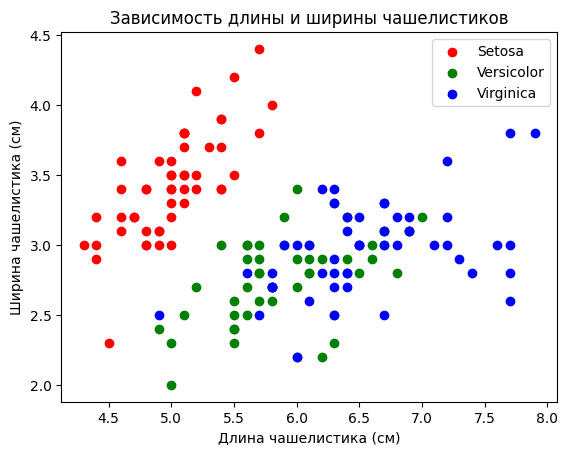

In [ ]:
# Отображение точек для каждого класса с уникальными цветами
df_pd = df.toPandas()
plt.scatter(df_pd[df_pd['variety_num']==0]['sepal_length'], df_pd[df_pd['variety_num']==0]['sepal_width'], label='Setosa', c='r')
plt.scatter(df_pd[df_pd['variety_num']==1]['sepal_length'], df_pd[df_pd['variety_num']==1]['sepal_width'], label='Versicolor', c='g')
plt.scatter(df_pd[df_pd['variety_num']==2]['sepal_length'], df_pd[df_pd['variety_num']==2]['sepal_width'], label='Virginica', c='b')

plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.title('Зависимость длины и ширины чашелистиков')

plt.legend()
plt.show()

In [ ]:
df_pd.head(5)

,sepal_length,sepal_width,petal_length,petal_width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


### Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

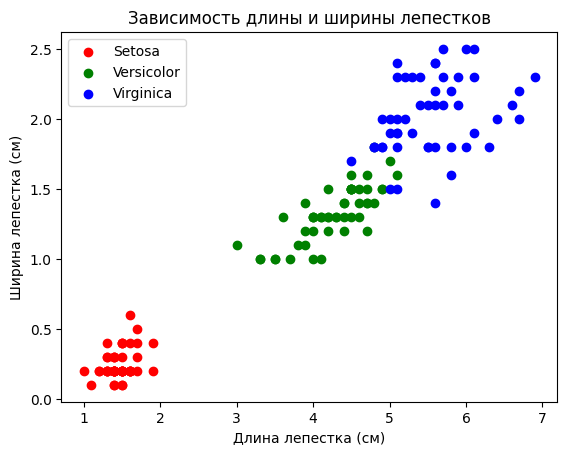

In [ ]:
# Зависимость длины и ширины лепестков
plt.scatter(df_pd[df_pd['variety_num']==0]['petal_length'], df_pd[df_pd['variety_num']==0]['petal_width'], label='Setosa', c='r')
plt.scatter(df_pd[df_pd['variety_num']==1]['petal_length'], df_pd[df_pd['variety_num']==1]['petal_width'], label='Versicolor', c='g')
plt.scatter(df_pd[df_pd['variety_num']==2]['petal_length'], df_pd[df_pd['variety_num']==2]['petal_width'], label='Virginica', c='b')

plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.title('Зависимость длины и ширины лепестков')

plt.legend()
plt.show()

### Посмотрите внимательно на получившийся график и сформируйте правило
вида:

 ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА `A` < `ЗНАЧЕНИЕ`, ТО `IRIS` ОТНОСИТСЯ К КЛАССУ `SETOSA` - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР `UNKNOWN`)


При помощи команд `withColumn`, `when`, `otherwise` создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql.functions import when, col
# Библиотека pyspark.sql.functions предоставляет функции для работы с данными в PySpark.
# Она содержит множество полезных функций, таких как when, col, sum, mean и другие,
# которые позволяют манипулировать данными, выполнять агрегацию, фильтрацию и многое другое.

In [ ]:
# Если значение столбца "petal_length" меньше 2, то в новой колонке "prediction" будет записано "Setosa".
# В противном случае, будет записано "Unknown".

df = df.withColumn("prediction", when(col("petal_length") < 2, "Setosa").otherwise("Unknown"))
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 5 rows



### Проверьте качество своего предсказания
Для этого:

1.   Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2.   Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)





In [ ]:
# Подсчитываем количество строк, где предсказали класс Setosa и правильный класс был так же Setosa.
correct_setosa = df.where(df['prediction'] == 'Setosa').count()

# Подсчитываем количество строк, где предсказали класс Setosa, а правильный класс был какой-то другой.
wrong_setosa = df.where((df['prediction'] == 'Setosa') & (df['variety'] != 'Setosa')).count()

print(f'Количество строк, где предсказали класс Setosa и правильный класс был так же Setosa: {correct_setosa}')
print(f'Количество строк, где предсказали класс Setosa, а правильный класс был какой-то другой: {wrong_setosa}')

Количество строк, где предсказали класс Setosa и правильный класс был так же Setosa: 50
Количество строк, где предсказали класс Setosa, а правильный класс был какой-то другой: 0
